In [6]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


C:\Users\Eier\AppData\Local\Temp\ipykernel_9804\3411714965.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\state


MAE: 16,947
RMSE: 22,232


C:\Users\Eier\AppData\Local\Temp\ipykernel_9804\3411714965.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = np.exp(model.forecast(steps=1)[0])


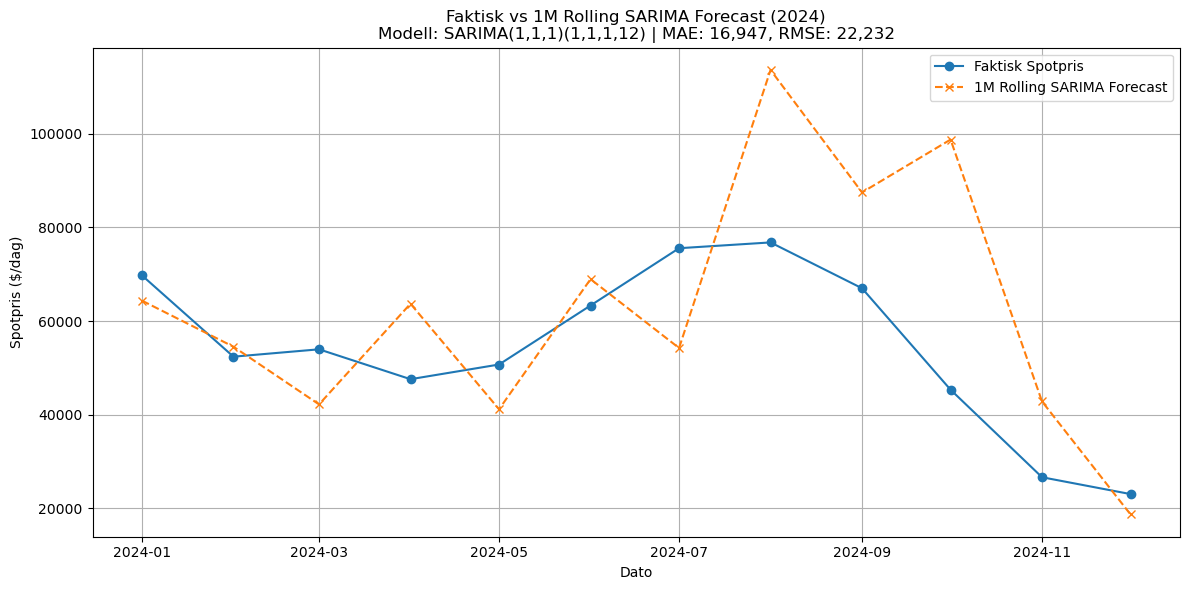

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Last inn og klargjør data ===
df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
df.rename(columns={"LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)": "LNG_Spot_Rate"}, inplace=True)
df["LNG_Spot_Rate"] = pd.to_numeric(df["LNG_Spot_Rate"], errors='coerce')

# Faktiske verdier for 2024
actual_2024 = df['2024-01-01':'2024-12-01']['LNG_Spot_Rate']
forecast_dates = actual_2024.index

# === 2. Kjør 1-måned rullerende forecast med fast SARIMA ===
rolling_forecasts = []

for forecast_date in forecast_dates:
    # Treningsdata = alt frem til måneden før
    end_train = forecast_date - pd.DateOffset(months=1)
    train_series = df[:end_train]['LNG_Spot_Rate']
    
    # Log-transformer treningsdata
    log_train = np.log(train_series.dropna())

    # Tren SARIMA-modell
    model = ARIMA(
        log_train,
        order=(1, 1, 1),
        seasonal_order=(1, 1, 1, 12)
    ).fit()

    # Prognoser log-verdi og transformér tilbake
    forecast = np.exp(model.forecast(steps=1)[0])
    rolling_forecasts.append(forecast)

# === 3. Evaluer ytelsen ===
forecast_series = pd.Series(rolling_forecasts, index=forecast_dates, name="Forecast")
comparison_df = pd.DataFrame({
    "Actual": actual_2024,
    "Forecast": forecast_series
})

mae = mean_absolute_error(comparison_df["Actual"], comparison_df["Forecast"])
rmse = np.sqrt(mean_squared_error(comparison_df["Actual"], comparison_df["Forecast"]))

print(f"\nMAE: {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")

# === 4. Plot ===
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df["Actual"], marker='o', label="Faktisk Spotpris")
plt.plot(comparison_df.index, comparison_df["Forecast"], marker='x', linestyle='--', label="1M Rolling SARIMA Forecast")
plt.title(f"Faktisk vs 1M Rolling SARIMA Forecast (2024)\nModell: SARIMA(1,1,1)(1,1,1,12) | MAE: {int(mae):,}, RMSE: {int(rmse):,}")
plt.xlabel("Dato")
plt.ylabel("Spotpris ($/dag)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Eier\AppData\Local\Temp\ipykernel_9804\3443875772.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=34.515, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=55.988, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=47.233, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=42.127, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=54.010, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=36.424, Time=0.63 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=35.243, Time=0.09 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=34.607, Time=0.46 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=32.226, Time=0.24 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.16 sec


C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\AppData\Local\Temp\ipykernel_9804\3443875772.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = np.exp(model.forecast(steps=1)[0])
C:\Users\Eier\anaconda3\Lib\site-packag


MAE: 12,797
RMSE: 15,459


C:\Users\Eier\AppData\Local\Temp\ipykernel_9804\3443875772.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = np.exp(model.forecast(steps=1)[0])


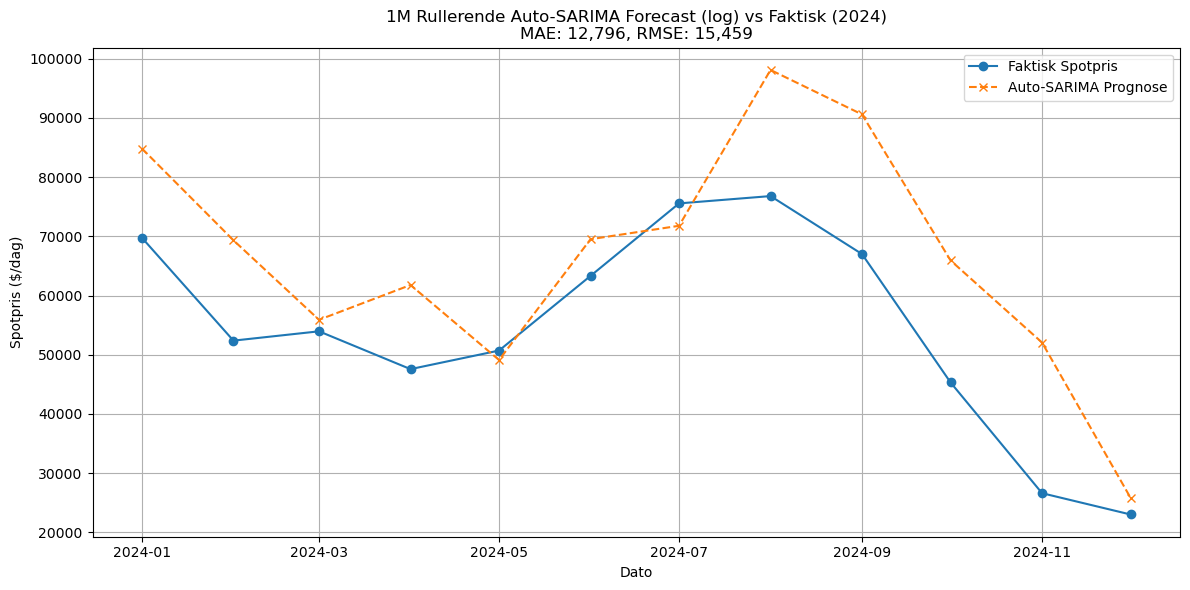

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Last inn og klargjør data ===
df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
df.rename(columns={"LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)": "LNG_Spot_Rate"}, inplace=True)
df["LNG_Spot_Rate"] = pd.to_numeric(df["LNG_Spot_Rate"], errors='coerce')

# Del opp data
train_full = df[:'2023-12-01']['LNG_Spot_Rate']
actual_2024 = df['2024-01-01':'2024-12-01']['LNG_Spot_Rate']
forecast_dates = actual_2024.index

# === 2. Kjør auto_arima én gang for å velge modell ===
log_train_full = np.log(train_full.dropna())

auto_model = auto_arima(
    log_train_full,
    seasonal=True,
    m=12,
    stepwise=True,
    suppress_warnings=True,
    trace=True
)

# Hent valgte SARIMA-parametere
order = auto_model.order
seasonal_order = auto_model.seasonal_order
print(f"\nBruker SARIMA{order}{seasonal_order} for hele 2024")

# === 3. Rullerende forecast for 2024 med valgte parametere ===
rolling_forecasts = []

for forecast_date in forecast_dates:
    # Treningsdata = alle faktiske data frem til forrige måned
    end_train = forecast_date - pd.DateOffset(months=1)
    train_series = df[:end_train]['LNG_Spot_Rate']
    log_train = np.log(train_series.dropna())

    # Tren SARIMA med faste parametere
    model = ARIMA(
        log_train,
        order=order,
        seasonal_order=seasonal_order
    ).fit()

    # Prognose og tilbake-transformasjon
    forecast = np.exp(model.forecast(steps=1)[0])
    rolling_forecasts.append(forecast)

# === 4. Evaluer og sammenlign med faktisk data ===
forecast_series = pd.Series(rolling_forecasts, index=forecast_dates, name="Forecast")
comparison_df = pd.DataFrame({
    "Actual": actual_2024,
    "Forecast": forecast_series
})

mae = mean_absolute_error(comparison_df["Actual"], comparison_df["Forecast"])
rmse = np.sqrt(mean_squared_error(comparison_df["Actual"], comparison_df["Forecast"]))

print(f"\nMAE: {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")

# === 5. Plot resultat ===
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df["Actual"], marker='o', label="Faktisk Spotpris")
plt.plot(comparison_df.index, comparison_df["Forecast"], marker='x', linestyle='--', label="Auto-SARIMA Prognose")
plt.title(f"1M Rullerende Auto-SARIMA Forecast (log) vs Faktisk (2024)\nMAE: {int(mae):,}, RMSE: {int(rmse):,}")
plt.xlabel("Dato")
plt.ylabel("Spotpris ($/dag)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Eier\AppData\Local\Temp\ipykernel_9804\1881882394.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\

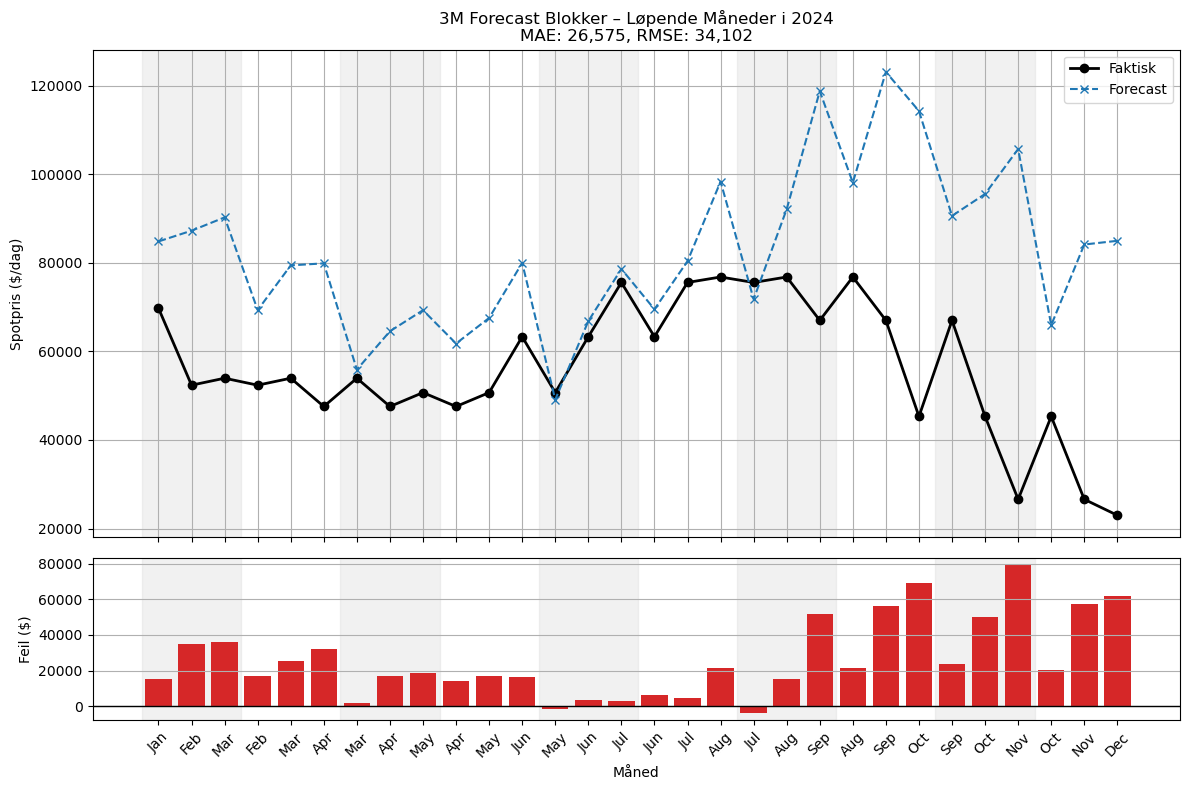

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Load and prepare data ===
df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
df.rename(columns={"LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)": "LNG_Spot_Rate"}, inplace=True)
df["LNG_Spot_Rate"] = pd.to_numeric(df["LNG_Spot_Rate"], errors='coerce')

# === 2. Forecast config ===
order = (1, 1, 2)
seasonal_order = (1, 0, 0, 12)
forecast_start_dates = pd.date_range(start="2024-01-01", end="2024-10-01", freq="MS")

all_forecasts = []
all_actuals = []
forecast_months = []

for start_date in forecast_start_dates:
    train_end = start_date - pd.DateOffset(months=1)
    train_series = df[:train_end]['LNG_Spot_Rate'].dropna()
    forecast_period = pd.date_range(start=start_date, periods=3, freq="MS")

    if not set(forecast_period).issubset(df.index):
        break

    actual = df.loc[forecast_period, 'LNG_Spot_Rate'].dropna()
    if len(actual) < 3:
        break

    log_train = np.log(train_series)
    model = ARIMA(log_train, order=order, seasonal_order=seasonal_order).fit()
    forecast_log = model.forecast(steps=3)
    forecast = np.exp(forecast_log)

    all_forecasts.extend(forecast)
    all_actuals.extend(actual.values)
    forecast_months.extend(forecast_period)

# === 3. Evaluation ===
x = np.arange(1, len(forecast_months) + 1)
month_labels = [d.strftime('%b') for d in forecast_months]
residuals = np.array(all_forecasts) - np.array(all_actuals)
mae = mean_absolute_error(all_actuals, all_forecasts)
rmse = np.sqrt(mean_squared_error(all_actuals, all_forecasts))

# === 4. Plot forecast + residuals with block shading ===
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Top panel: forecast vs actual
axes[0].plot(x, all_actuals, marker='o', label="Faktisk", color='black', linewidth=2)
axes[0].plot(x, all_forecasts, marker='x', linestyle='--', label="Forecast", color='tab:blue')

# Shade 3M blocks
block_len = 3
block_count = len(x) // block_len
for i in range(block_count):
    if i % 2 == 0:
        axes[0].axvspan(i * block_len + 0.5, (i + 1) * block_len + 0.5, color='lightgray', alpha=0.3)
        axes[1].axvspan(i * block_len + 0.5, (i + 1) * block_len + 0.5, color='lightgray', alpha=0.3)

axes[0].set_title(f"3M Forecast Blokker – Løpende Måneder i 2024\nMAE: {int(mae):,}, RMSE: {int(rmse):,}")
axes[0].set_ylabel("Spotpris ($/dag)")
axes[0].legend()
axes[0].grid(True)

# Bottom panel: residuals
axes[1].bar(x, residuals, color='tab:red')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].set_ylabel("Feil ($)")
axes[1].set_xlabel("Måned")
axes[1].grid(True, axis='y')
axes[1].set_xticks(x)
axes[1].set_xticklabels(month_labels, rotation=45)

plt.tight_layout()
plt.show()


C:\Users\Eier\AppData\Local\Temp\ipykernel_9804\3535157098.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\

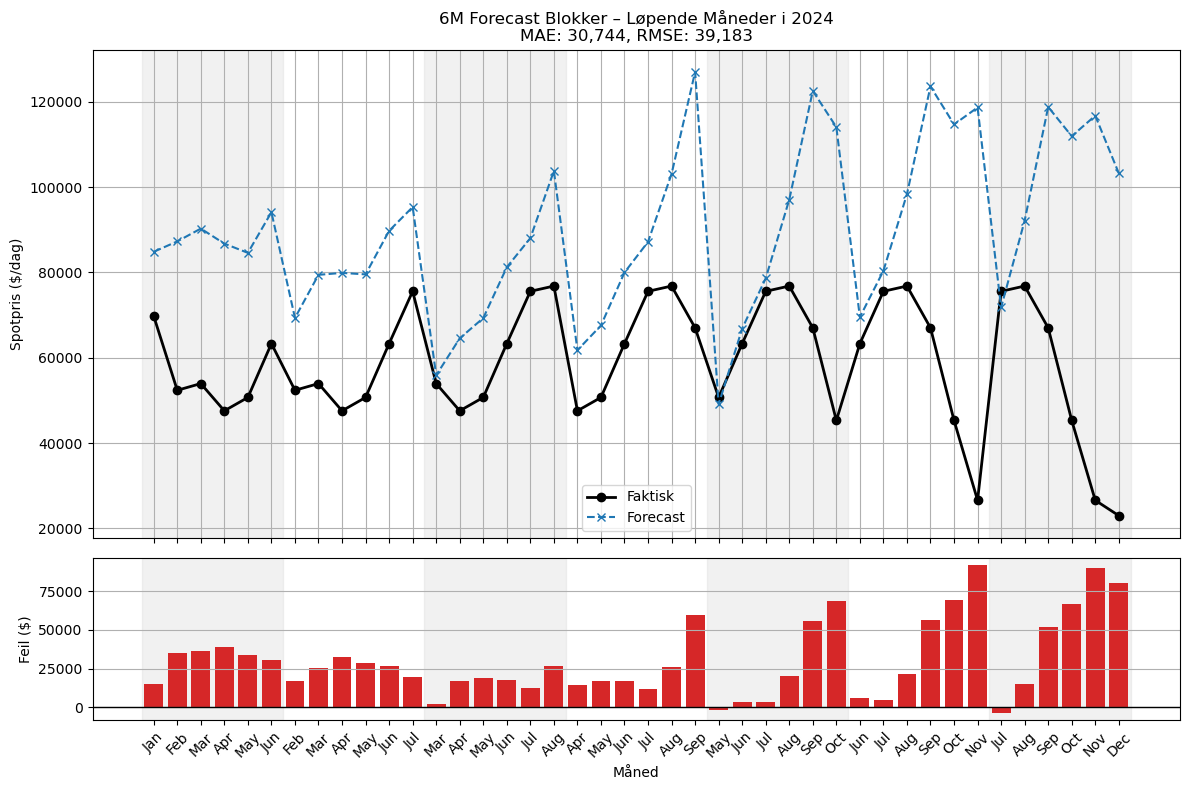

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Load and prepare data ===
df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
df.rename(columns={"LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)": "LNG_Spot_Rate"}, inplace=True)
df["LNG_Spot_Rate"] = pd.to_numeric(df["LNG_Spot_Rate"], errors='coerce')

# === 2. Forecast config ===
order = (1, 1, 2)
seasonal_order = (1, 0, 0, 12)
forecast_start_dates = pd.date_range(start="2024-01-01", end="2024-07-01", freq="MS")  # Siste start: Jul 2024

all_forecasts = []
all_actuals = []
forecast_months = []

for start_date in forecast_start_dates:
    train_end = start_date - pd.DateOffset(months=1)
    train_series = df[:train_end]['LNG_Spot_Rate'].dropna()
    forecast_period = pd.date_range(start=start_date, periods=6, freq="MS")

    if not set(forecast_period).issubset(df.index):
        break

    actual = df.loc[forecast_period, 'LNG_Spot_Rate'].dropna()
    if len(actual) < 6:
        break

    log_train = np.log(train_series)
    model = ARIMA(log_train, order=order, seasonal_order=seasonal_order).fit()
    forecast_log = model.forecast(steps=6)
    forecast = np.exp(forecast_log)

    all_forecasts.extend(forecast)
    all_actuals.extend(actual.values)
    forecast_months.extend(forecast_period)

# === 3. Evaluation ===
x = np.arange(1, len(forecast_months) + 1)
month_labels = [d.strftime('%b') for d in forecast_months]
residuals = np.array(all_forecasts) - np.array(all_actuals)
mae = mean_absolute_error(all_actuals, all_forecasts)
rmse = np.sqrt(mean_squared_error(all_actuals, all_forecasts))

# === 4. Plot forecast + residuals with 6M block shading ===
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Øvre panel: forecast og faktisk
axes[0].plot(x, all_actuals, marker='o', label="Faktisk", color='black', linewidth=2)
axes[0].plot(x, all_forecasts, marker='x', linestyle='--', label="Forecast", color='tab:blue')

# Skyggelegging for 6M-blokker
block_len = 6
block_count = len(x) // block_len
for i in range(block_count):
    if i % 2 == 0:
        axes[0].axvspan(i * block_len + 0.5, (i + 1) * block_len + 0.5, color='lightgray', alpha=0.3)
        axes[1].axvspan(i * block_len + 0.5, (i + 1) * block_len + 0.5, color='lightgray', alpha=0.3)

axes[0].set_title(f"6M Forecast Blokker – Løpende Måneder i 2024\nMAE: {int(mae):,}, RMSE: {int(rmse):,}")
axes[0].set_ylabel("Spotpris ($/dag)")
axes[0].legend()
axes[0].grid(True)

# Nedre panel: residualer
axes[1].bar(x, residuals, color='tab:red')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].set_ylabel("Feil ($)")
axes[1].set_xlabel("Måned")
axes[1].grid(True, axis='y')
axes[1].set_xticks(x)
axes[1].set_xticklabels(month_labels, rotation=45)

plt.tight_layout()
plt.show()


C:\Users\Eier\AppData\Local\Temp\ipykernel_9804\3421832007.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


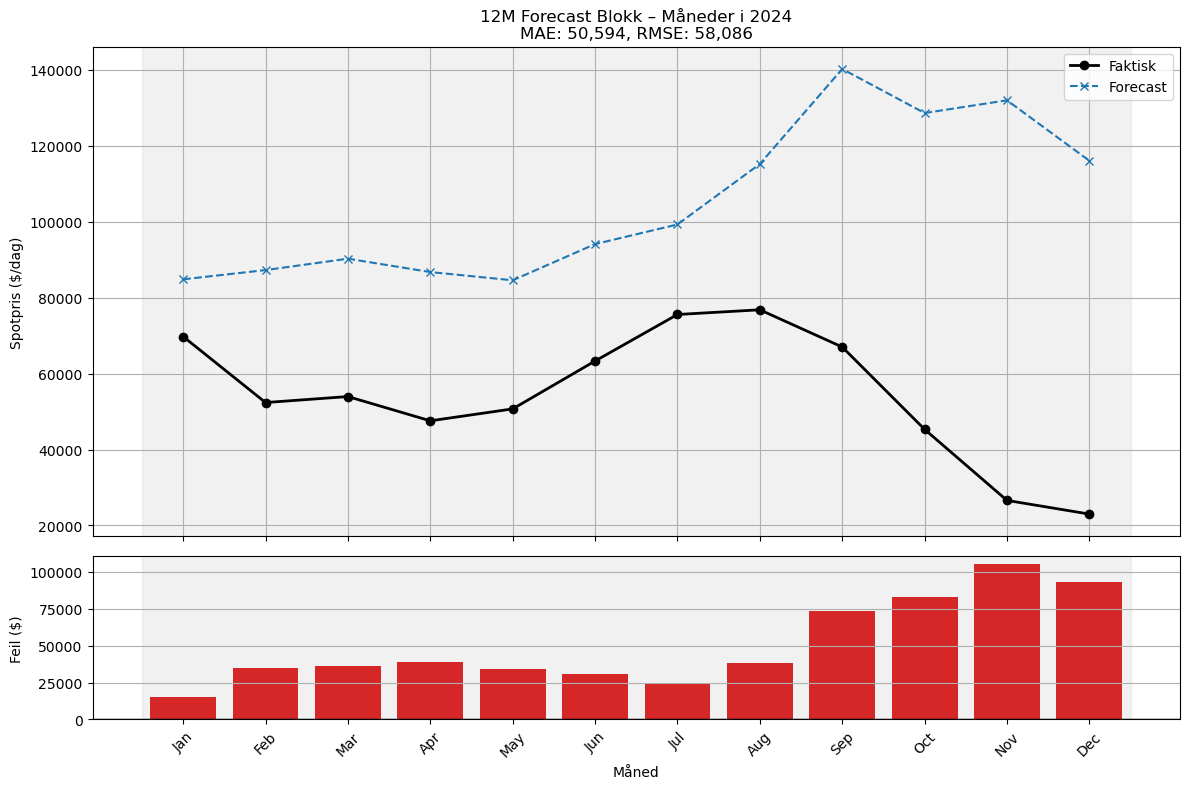

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Load and prepare data ===
df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
df.rename(columns={"LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)": "LNG_Spot_Rate"}, inplace=True)
df["LNG_Spot_Rate"] = pd.to_numeric(df["LNG_Spot_Rate"], errors='coerce')

# === 2. Forecast configuration ===
order = (1, 1, 2)
seasonal_order = (1, 0, 0, 12)
start_date = pd.to_datetime("2024-01-01")
forecast_period = pd.date_range(start=start_date, periods=12, freq="MS")

train_end = start_date - pd.DateOffset(months=1)
train_series = df[:train_end]['LNG_Spot_Rate'].dropna()
actual = df.loc[forecast_period, 'LNG_Spot_Rate'].dropna()

# Only run if actual data is available
if len(actual) == 12:
    log_train = np.log(train_series)
    model = ARIMA(log_train, order=order, seasonal_order=seasonal_order).fit()
    forecast_log = model.forecast(steps=12)
    forecast = np.exp(forecast_log)

    # Evaluation
    residuals = forecast - actual.values
    mae = mean_absolute_error(actual.values, forecast)
    rmse = np.sqrt(mean_squared_error(actual.values, forecast))
    x = np.arange(1, 13)
    month_labels = [d.strftime('%b') for d in forecast_period]

    # === 3. Plot forecast + residuals ===
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

    # Top panel: forecast vs actual
    axes[0].plot(x, actual.values, marker='o', label="Faktisk", color='black', linewidth=2)
    axes[0].plot(x, forecast, marker='x', linestyle='--', label="Forecast", color='tab:blue')

    # Background shading for the block
    axes[0].axvspan(0.5, 12.5, color='lightgray', alpha=0.3)
    axes[1].axvspan(0.5, 12.5, color='lightgray', alpha=0.3)

    axes[0].set_title(f"12M Forecast Blokk – Måneder i 2024\nMAE: {int(mae):,}, RMSE: {int(rmse):,}")
    axes[0].set_ylabel("Spotpris ($/dag)")
    axes[0].legend()
    axes[0].grid(True)

    # Bottom panel: residuals
    axes[1].bar(x, residuals, color='tab:red')
    axes[1].axhline(0, color='black', linewidth=1)
    axes[1].set_ylabel("Feil ($)")
    axes[1].set_xlabel("Måned")
    axes[1].grid(True, axis='y')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(month_labels, rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("Ikke nok faktisk data tilgjengelig for hele 2024.")


C:\Users\Eier\AppData\Local\Temp\ipykernel_9804\1252446418.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\AppData\Local\Temp\ipykernel_9804\1252446418.py:2

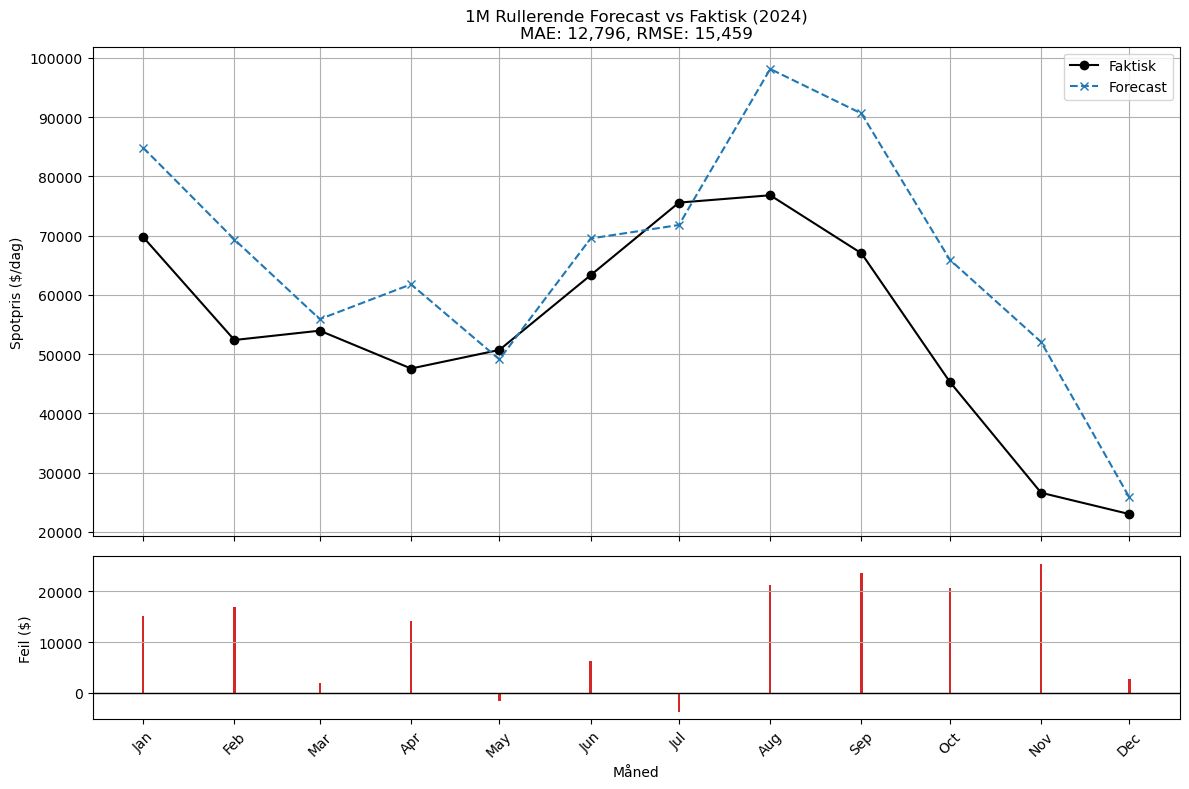

In [42]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Load data ===
df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
df.rename(columns={"LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)": "LNG_Spot_Rate"}, inplace=True)
df["LNG_Spot_Rate"] = pd.to_numeric(df["LNG_Spot_Rate"], errors='coerce')

# === Forecast config ===
train_full = df[:'2023-12-01']['LNG_Spot_Rate']
log_train_full = np.log(train_full.dropna())
auto_model = auto_arima(log_train_full, seasonal=True, m=12, stepwise=True, suppress_warnings=True)
order = auto_model.order
seasonal_order = auto_model.seasonal_order

forecast_dates = pd.date_range(start="2024-01-01", end="2024-12-01", freq="MS")
rolling_forecasts = []

for forecast_date in forecast_dates:
    end_train = forecast_date - pd.DateOffset(months=1)
    train_series = df[:end_train]['LNG_Spot_Rate']
    log_train = np.log(train_series.dropna())
    model = ARIMA(log_train, order=order, seasonal_order=seasonal_order).fit()
    forecast = np.exp(model.forecast(steps=1)[0])
    rolling_forecasts.append(forecast)

# === Evaluate ===
forecast_series = pd.Series(rolling_forecasts, index=forecast_dates)
actual_2024 = df['2024-01-01':'2024-12-01']['LNG_Spot_Rate']
residuals = forecast_series - actual_2024
mae = mean_absolute_error(actual_2024, forecast_series)
rmse = np.sqrt(mean_squared_error(actual_2024, forecast_series))

# === Plot ===
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
axes[0].plot(actual_2024.index, actual_2024.values, marker='o', label="Faktisk", color='black')
axes[0].plot(forecast_series.index, forecast_series.values, marker='x', linestyle='--', label="Forecast", color='tab:blue')
axes[0].set_title(f"1M Rullerende Forecast vs Faktisk (2024)\nMAE: {int(mae):,}, RMSE: {int(rmse):,}")
axes[0].set_ylabel("Spotpris ($/dag)")
axes[0].legend()
axes[0].grid(True)

axes[1].bar(residuals.index, residuals.values, color='tab:red')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].set_ylabel("Feil ($)")
axes[1].set_xlabel("Måned")
axes[1].grid(True, axis='y')
axes[1].set_xticks(residuals.index)
axes[1].set_xticklabels([d.strftime('%b') for d in residuals.index], rotation=45)

plt.tight_layout()
plt.show()
